## 欠損値の処理

In [1]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [2]:
%autoreload

In [3]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_20_to_21.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str, 'owner_id': str})

In [4]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=206)

In [5]:
df

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,jockey_dirt_win_sum_last_two_years,jockey_win_proba_mean_last_two_years,jockey_win_proba_max_last_two_years,jockey_top_2_proba_mean_last_two_years,jockey_top_2_proba_max_last_two_years,jockey_top_3_proba_mean_last_two_years,jockey_top_3_proba_max_last_two_years,jockey_earned_prize_mean_last_two_years,jockey_earned_prize_max_last_two_years,jockey_earned_prize_sum_last_two_years
0,202101010101,2018104780,01144,01136,414030,15.0,1,1,0,3,...,28.0,0.0,0.0,0.1325,0.149,0.1920,0.211,60291.30,69338.7,120582.6
1,202101010101,2018100570,00666,01039,728008,6.0,1,2,1,3,...,104.0,0.0,0.0,0.3150,0.327,0.4120,0.417,231707.70,232931.3,463415.4
2,202101010101,2018101518,01173,01093,942006,10.0,2,3,1,3,...,17.0,0.0,0.0,0.0525,0.059,0.0930,0.101,19622.50,25462.0,39245.0
3,202101010101,2018101447,01091,01076,546800,12.0,2,4,0,3,...,16.0,0.0,0.0,0.1040,0.111,0.1790,0.186,63576.30,65813.8,127152.6
4,202101010101,2018101539,01015,00417,163002,5.0,3,5,1,3,...,22.0,0.0,0.0,0.1220,0.131,0.1765,0.182,48988.85,53312.8,97977.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,202010020812,2017106438,01152,01098,478030,2.0,6,11,0,3,...,16.0,0.0,0.0,0.0805,0.089,0.1200,0.130,25200.05,33128.0,50400.1
47872,202010020812,2017103149,01168,01039,933006,9.0,7,12,1,3,...,28.0,0.0,0.0,0.0785,0.100,0.1375,0.154,27746.95,42461.5,55493.9
47873,202010020812,2017105123,01166,01087,506800,15.0,7,13,1,3,...,34.0,0.0,0.0,0.1130,0.125,0.1895,0.198,49791.85,55710.9,99583.7
47874,202010020812,2016110126,01115,01022,138007,12.0,8,14,0,4,...,49.0,0.0,0.0,0.2110,0.215,0.3135,0.319,129619.45,131236.6,259238.9


In [6]:
df.dropna()

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,jockey_dirt_win_sum_last_two_years,jockey_win_proba_mean_last_two_years,jockey_win_proba_max_last_two_years,jockey_top_2_proba_mean_last_two_years,jockey_top_2_proba_max_last_two_years,jockey_top_3_proba_mean_last_two_years,jockey_top_3_proba_max_last_two_years,jockey_earned_prize_mean_last_two_years,jockey_earned_prize_max_last_two_years,jockey_earned_prize_sum_last_two_years
0,202101010101,2018104780,01144,01136,414030,15.0,1,1,0,3,...,28.0,0.0,0.0,0.1325,0.149,0.1920,0.211,60291.30,69338.7,120582.6
1,202101010101,2018100570,00666,01039,728008,6.0,1,2,1,3,...,104.0,0.0,0.0,0.3150,0.327,0.4120,0.417,231707.70,232931.3,463415.4
2,202101010101,2018101518,01173,01093,942006,10.0,2,3,1,3,...,17.0,0.0,0.0,0.0525,0.059,0.0930,0.101,19622.50,25462.0,39245.0
3,202101010101,2018101447,01091,01076,546800,12.0,2,4,0,3,...,16.0,0.0,0.0,0.1040,0.111,0.1790,0.186,63576.30,65813.8,127152.6
4,202101010101,2018101539,01015,00417,163002,5.0,3,5,1,3,...,22.0,0.0,0.0,0.1220,0.131,0.1765,0.182,48988.85,53312.8,97977.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,202010020812,2017106438,01152,01098,478030,2.0,6,11,0,3,...,16.0,0.0,0.0,0.0805,0.089,0.1200,0.130,25200.05,33128.0,50400.1
47872,202010020812,2017103149,01168,01039,933006,9.0,7,12,1,3,...,28.0,0.0,0.0,0.0785,0.100,0.1375,0.154,27746.95,42461.5,55493.9
47873,202010020812,2017105123,01166,01087,506800,15.0,7,13,1,3,...,34.0,0.0,0.0,0.1130,0.125,0.1895,0.198,49791.85,55710.9,99583.7
47874,202010020812,2016110126,01115,01022,138007,12.0,8,14,0,4,...,49.0,0.0,0.0,0.2110,0.215,0.3135,0.319,129619.45,131236.6,259238.9


In [7]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [9]:
df_22_23 = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features.csv'), 
                    index_col=0,  sep="\t", dtype={'jockey_id': str, 'trainer_id': str, 'owner_id': str})
df_22_23.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=206)

In [10]:
with open(os.path.join(local_paths.MODELS_DIR, '2022_model_1_1.pickle'), mode='rb') as f:
  model = pickle.load(f)

## RFmodel

In [10]:
%autoreload

In [11]:
rf = predict.RFModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = rf.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6520 3370]
 [ 886 1983]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.66      0.75      9890
           1       0.37      0.69      0.48      2869

    accuracy                           0.67     12759
   macro avg       0.63      0.68      0.62     12759
weighted avg       0.77      0.67      0.69     12759

Accuracy: 0.6664315385218277
Feature Importance:
                                      feature  importance
81       rank_mean_in_mode_course_len_past_5    0.026714
90      prize_mean_in_mode_course_len_past_5    0.021894
91       prize_sum_in_mode_course_len_past_5    0.019324
44                         prize_mean_past_5    0.017779
69              rank_mean_in_mode_course_len    0.017124
34                          rank_mean_past_5    0.016859
18                                 rank_mean    0.015687
45                          prize_sum_past_5    0.014439
85  rank_diff_mean_in_mode_course_len_pa

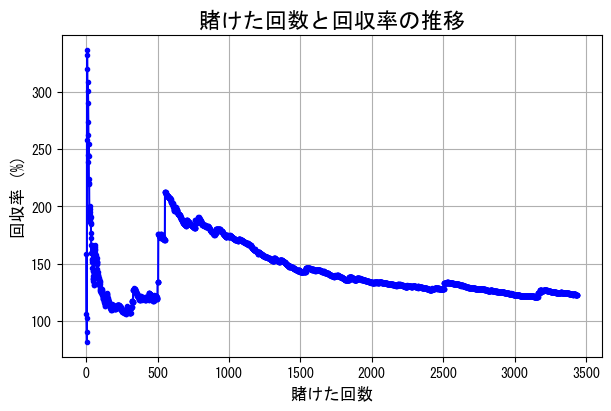

総払い戻し金額: 4848320.0円
賭けた回数: 3438回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202201010102,3170.0,2000,2000,3170.0,1.585000
1,202201010103,0.0,1000,3000,3170.0,1.056667
2,202201010104,0.0,100,3100,3170.0,1.022581
3,202201010106,0.0,400,3500,3170.0,0.905714
4,202201010107,0.0,400,3900,3170.0,0.812821
...,...,...,...,...,...,...
3433,202310030712,0.0,400,3938800,4829670.0,1.226178
3434,202310030802,0.0,1000,3939800,4829670.0,1.225867
3435,202310030803,0.0,400,3940200,4829670.0,1.225742
3436,202310030804,18650.0,3500,3943700,4848320.0,1.229384


In [12]:
rf.plot_returns_rate(df_22_23)

## NNmodel

In [13]:
%autoreload

In [14]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = nn.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6755 3135]
 [ 905 1964]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77      9890
           1       0.39      0.68      0.49      2869

    accuracy                           0.68     12759
   macro avg       0.63      0.68      0.63     12759
weighted avg       0.77      0.68      0.71     12759

Accuracy: 0.6833607649502312
predicted_target
0    30926
1    20569
Name: count, dtype: int64
            race_id  horse_id  jockey_id  trainer_id  owner_id  rank  frame  \
1      202201010101      9390         37          11       996   4.0      2   
3      202201010101      7667         75          19      1438   5.0      4   
6      202201010102      3823        130         146      1282   5.0      2   
7      202201010102      5378        108         154       677   1.0      3   
8      202201010102      4074         40         161       779   3.0      4   
...             ...       ...      

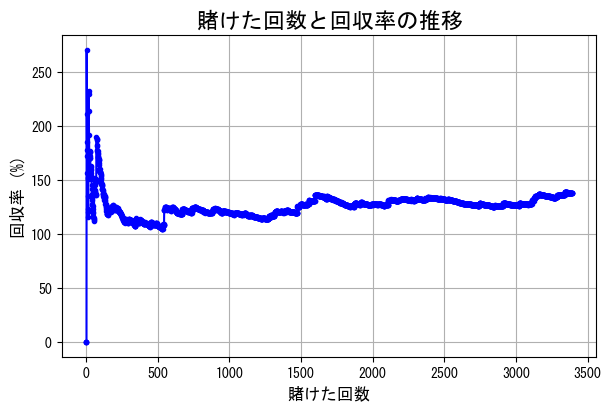

総払い戻し金額: 5338520.0円
賭けた回数: 3392回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202201010103,0.0,2000,2000,0.0,0.000000
1,202201010106,0.0,1000,3000,0.0,0.000000
2,202201010107,0.0,1000,4000,0.0,0.000000
3,202201010108,0.0,400,4400,0.0,0.000000
4,202201010109,21400.0,3500,7900,21400.0,2.708861
...,...,...,...,...,...,...
3387,202310030803,0.0,400,3858800,5319870.0,1.378633
3388,202310030804,18650.0,3500,3862300,5338520.0,1.382213
3389,202310030807,0.0,1000,3863300,5338520.0,1.381855
3390,202310030808,0.0,1000,3864300,5338520.0,1.381497


In [15]:
nn.plot_returns_rate(df_22_23)

## LGBmodel

In [16]:
%autoreload

In [17]:
lgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = lgb.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 11526, number of negative: 11526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28810
[LightGBM] [Info] Number of data points in the train set: 23052, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[6905 2985]
 [ 832 2037]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78      9890
           1       0.41      0.71      0.52      2869

    accuracy                           0.70     12759
   macro avg       0.65      0.70      0.65     12759
weighted avg       0.78      0.70      0.72     12759

Accuracy: 0.7008386237165922
Feature Importance:
                                       feature  importance
91        prize_sum_in_mode_course_len_past_5         

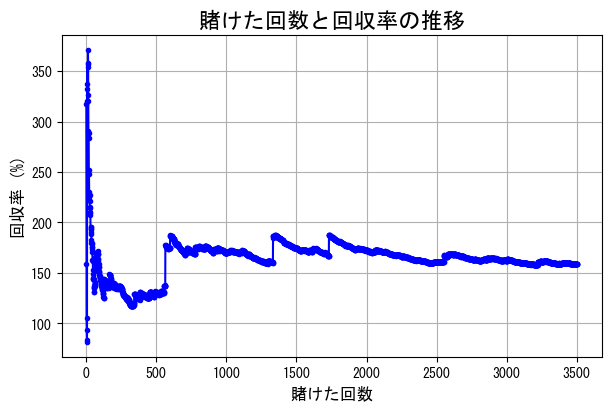

総払い戻し金額: 6112080.0円
賭けた回数: 3502回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202201010102,3170.0,1000,1000,3170.0,3.170000
1,202201010103,0.0,1000,2000,3170.0,1.585000
2,202201010104,0.0,1000,3000,3170.0,1.056667
3,202201010106,0.0,400,3400,3170.0,0.932353
4,202201010107,0.0,400,3800,3170.0,0.834211
...,...,...,...,...,...,...
3497,202310030712,0.0,1000,3855200,6112080.0,1.585412
3498,202310030802,0.0,1000,3856200,6112080.0,1.585001
3499,202310030803,0.0,1000,3857200,6112080.0,1.584590
3500,202310030808,0.0,400,3857600,6112080.0,1.584426


In [18]:
lgb.plot_returns_rate(df_22_23)

## XGBmodel

In [19]:
%autoreload

In [20]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = xgb.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6891 2999]
 [ 827 2042]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78      9890
           1       0.41      0.71      0.52      2869

    accuracy                           0.70     12759
   macro avg       0.65      0.70      0.65     12759
weighted avg       0.78      0.70      0.72     12759

Accuracy: 0.7001332392820754
Feature Importance:
                                       feature  importance
81        rank_mean_in_mode_course_len_past_5    0.071505
34                           rank_mean_past_5    0.031553
82         rank_min_in_mode_course_len_past_5    0.019860
19                                   rank_min    0.015826
147               jockey_stakes_win_last_year    0.015785
44                          prize_mean_past_5    0.014548
157              jockey_top_3_proba_last_year    0.014343
35                            rank_min_past_5    0.012685
158             jockey_earned_p

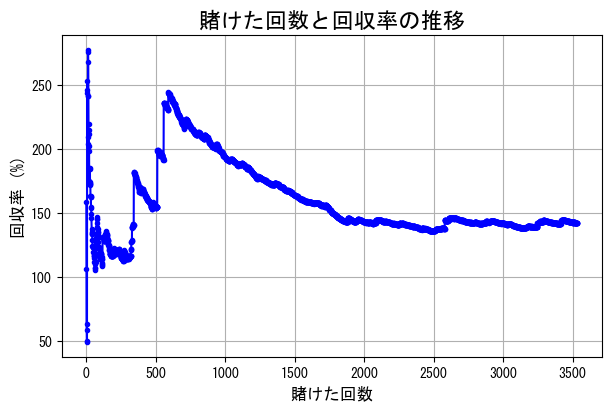

総払い戻し金額: 5457160.0円
賭けた回数: 3532回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202201010102,3170.0,2000,2000,3170.0,1.585000
1,202201010103,0.0,1000,3000,3170.0,1.056667
2,202201010104,0.0,2000,5000,3170.0,0.634000
3,202201010106,0.0,400,5400,3170.0,0.587037
4,202201010107,0.0,1000,6400,3170.0,0.495312
...,...,...,...,...,...,...
3527,202310030802,0.0,1000,3847700,5457160.0,1.418291
3528,202310030803,0.0,400,3848100,5457160.0,1.418144
3529,202310030807,0.0,1000,3849100,5457160.0,1.417776
3530,202310030808,0.0,1000,3850100,5457160.0,1.417407


In [22]:
xgb.plot_returns_rate(df_22_23)

## Ensamblemodel

In [23]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=206)

In [24]:
%autoreload

In [33]:
en = predict.EnsembleModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, stochastic_variation=False, max_bet=1000)
pred_df = en.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)


 training... 


Confusion Matrix:
 [[5097 1266]
 [ 901  902]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      6363
           1       0.42      0.50      0.45      1803

    accuracy                           0.73      8166
   macro avg       0.63      0.65      0.64      8166
weighted avg       0.75      0.73      0.74      8166

Accuracy: 0.7346313984815087
Feature Importance:
                                      feature  importance
81       rank_mean_in_mode_course_len_past_5    0.025798
90      prize_mean_in_mode_course_len_past_5    0.022221
91       prize_sum_in_mode_course_len_past_5    0.020695
44                         prize_mean_past_5    0.018427
34                          rank_mean_past_5    0.016031
69              rank_mean_in_mode_course_len    0.015398
85  rank_diff_mean_in_mode_course_len_past_5    0.014830
18                                 rank_mean    0.013789
45                     

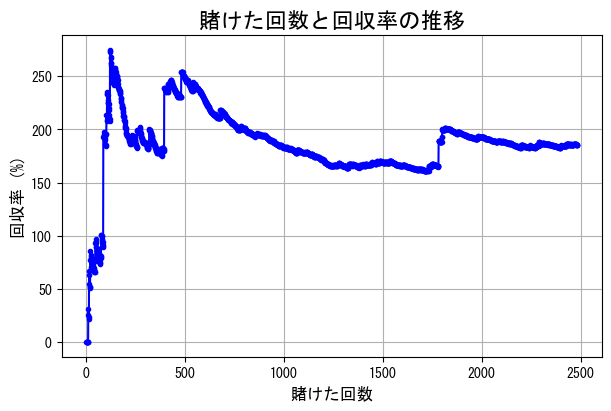

総払い戻し金額: 1817050.0円
賭けた回数: 2482回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202201010102,0.0,400,400,0.0,0.000000
1,202201010103,0.0,400,800,0.0,0.000000
2,202201010104,0.0,100,900,0.0,0.000000
3,202201010106,0.0,100,1000,0.0,0.000000
4,202201010109,0.0,1000,2000,0.0,0.000000
...,...,...,...,...,...,...
2477,202310030712,0.0,400,979200,1817050.0,1.855647
2478,202310030802,0.0,100,979300,1817050.0,1.855458
2479,202310030803,0.0,100,979400,1817050.0,1.855269
2480,202310030807,0.0,400,979800,1817050.0,1.854511


In [34]:
en.plot_returns_rate(df_22_23)

In [35]:
en_returns = en.calc_returns_rate(df_22_23)

In [36]:
en_returns.head(50)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202201010102,0.0,400,400,0.0,0.000000
1,202201010103,0.0,400,800,0.0,0.000000
2,202201010104,0.0,100,900,0.0,0.000000
3,202201010106,0.0,100,1000,0.0,0.000000
4,202201010109,0.0,1000,2000,0.0,0.000000
5,202201010110,0.0,100,2100,0.0,0.000000
6,202201010112,0.0,100,2200,0.0,0.000000
7,202201010202,0.0,100,2300,0.0,0.000000
8,202201010203,0.0,100,2400,0.0,0.000000
9,202201010204,0.0,1000,3400,0.0,0.000000
